In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import os
#os.path.exists('/content/src/')
os.chdir('/content/drive/My Drive/')
currentDirectory = os.getcwd()
print(currentDirectory)

In [ ]:
import numpy as np
import csv
from keras.utils import to_categorical
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
import pandas as pd


df_train = pd.read_csv('/content/drive/My Drive/data/mitbih_train.csv', header=None)
#df_train = numpy.genfromtxt('/content/drive/My Drive/data/mitbih_train.csv',delimiter= " ",dtype=numpy.float);
#df_train = df_train.sample(frac=1)
df_test = pd.read_csv('/content/drive/My Drive/data/mitbih_test.csv', header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

model1_load = keras.models.load_model('/content/drive/My Drive/saved_models/PhD_Model1')
#new_model3.summary()

y_pred = model1_load.predict(X)
y_pred_classes_train = np.argmax(y_pred, axis=-1)
C = np.matrix([np.asarray(Y), np.asarray(y_pred_classes_train)])
np.savetxt('model1_train_Predict.txt', C, delimiter=',', fmt='%f')

y_pred = model1_load.predict(X_test)
y_pred_classes_test = np.argmax(y_pred, axis=-1)
C = np.matrix([np.asarray(Y_test), np.asarray(y_pred_classes_test)])
np.savetxt('model1_test_Predict.txt', C, delimiter=',', fmt='%f')

In [ ]:

import pandas as pd
import numpy as np
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,Conv1D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, ELU, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score


batch_size = 64
epochs = 100
df_train = pd.read_csv('/content/drive/My Drive/data/mitbih_train.csv', header=None)
#df_train = numpy.genfromtxt('/content/drive/My Drive/data/mitbih_train.csv',delimiter= " ",dtype=numpy.float);
#df_train = df_train.sample(frac=1)
df_test = pd.read_csv('/content/drive/My Drive/data/mitbih_test.csv', header=None)
Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]
Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

def get_model():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.softmax, name="dense_3_mitbih")(dense_1)
    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)
    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

model = get_model()
file_path = "baseline_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

model.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(file_path)

test_predict = model.predict(X_test)
test_predict_label = np.argmax(test_predict, axis=-1)
test_true = np.argmax(Y_test, axis=-1)
X_train = model.predict(X)
train_pred_classes = np.argmax(X_train, axis=-1)
train_true = np.argmax(Y, axis=-1)

test_eval =  accuracy_score(Y_test, test_predict_label)
train_eval =  accuracy_score(Y, train_pred_classes)

print('Test accuracy:', test_eval)

print('train accuracy:', train_eval)



KeyboardInterrupt: ignored

In [ ]:
model.load_weights(file_path)

test_predict = model.predict(X_test)
test_predict_label = np.argmax(test_predict, axis=-1)
test_true = np.argmax(Y_test, axis=-1)
X_train = model.predict(X)
train_pred_classes = np.argmax(X_train, axis=-1)
train_true = np.argmax(Y, axis=-1)

test_eval =  accuracy_score(Y_test, test_predict_label)
train_eval =  accuracy_score(Y, train_pred_classes)

print('Test accuracy:', test_eval)

print('train accuracy:', train_eval)

Test accuracy: 0.9075918143614106
train accuracy: 0.9123626561893231


In [ ]:
f1 = f1_score(Y_test, test_predict_label, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, test_predict_label)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.509459112919254 
Test accuracy score : 0.9075918143614106 


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[7233900    9800    3400       0       0]
 [  29100  191800    1400       0       0]
 [  15300    1100  562400       0       0]
 [  41500     100   22500       0       0]
 [ 335600     300  307200       0       0]]
[7233900  191800  562400       0       0]


<Figure size 432x288 with 0 Axes>

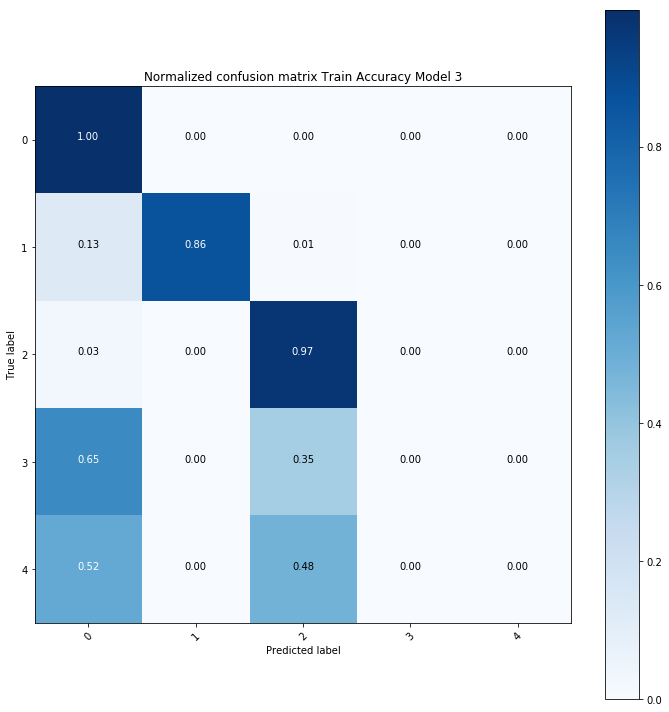

[[1806000    4100    1700       0       0]
 [  12000   42800     800       0       0]
 [   5900     800  138100       0       0]
 [  10300       0    5900       0       0]
 [  84300     100   76400       0       0]]
[1806000   42800  138100       0       0]


<Figure size 432x288 with 0 Axes>

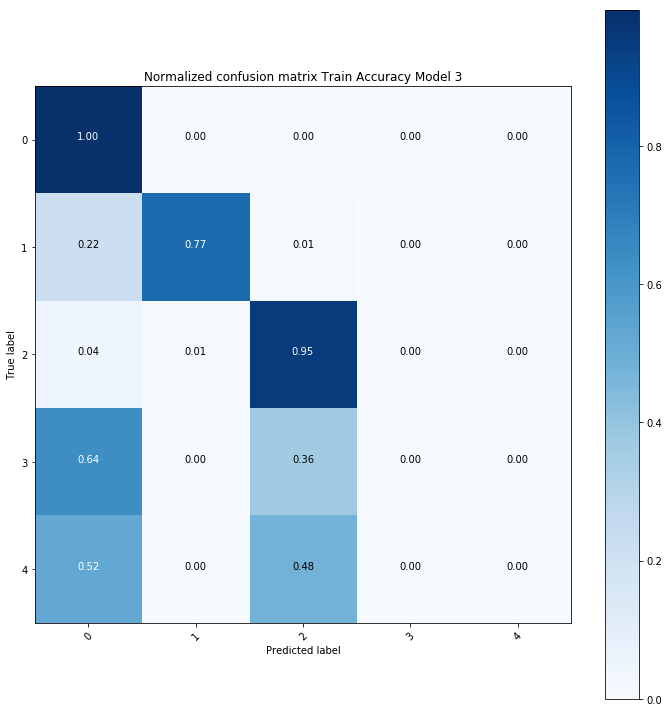

In [ ]:
import numpy as np
import csv
from keras.utils import to_categorical
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
import pandas as pd


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



confusion_mat = confusion_matrix(Y, train_pred_classes)
# plot the confusion matrix
# plot normalized confusion matrix
conf = confusion_mat  *100
#numpy.savetxt('/content/drive/My Drive/app/Models/Train_model_3.csv',conf,delimiter=',')
#conf.to_csv('Train_model_3.csv')
print(conf)
diagonal = np.diag(conf)
print(diagonal)
plt.figure()
plot_confusion_matrix(confusion_mat, classes = range(5), title='Normalized confusion matrix Train Accuracy Model 3')
plt.show()


confusion_mat_test = confusion_matrix(Y_test, test_predict_label)
# plot the confusion matrix
# plot normalized confusion matrix
conf_test = confusion_mat_test  *100
#numpy.savetxt('/content/drive/My Drive/app/Models/Train_model_3.csv',conf,delimiter=',')
#conf.to_csv('Train_model_3.csv')
print(conf_test)
diagonal_test = np.diag(conf_test)
print(diagonal_test)
plt.figure()
plot_confusion_matrix(confusion_mat_test, classes = range(5), title='Normalized confusion matrix Test Accuracy Model 3')
plt.show()


